In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
sns.set_style('white')

import os
import collections
import glob
from scipy.stats import pearsonr
import scipy.optimize
import scipy.stats

In [11]:
results = pd.DataFrame(pd.read_csv('../../Kd_Inference/results_CH65/Kd_processed/20220603_titeseq_isogenic_corr.csv',delimiter=','))

In [12]:
g = results.groupby(['antigen', 'shortname'])
results_merge = pd.DataFrame({
    'KD' : -g.mean()['KD'],
    'KD_std' : g.mean()['KD_err'],
    'KD_titeseq' : g['KD_titeseq'].mean(),
    'KD_titeseq_err' : g['KD_titeseq_err'].mean()
})

results_merge

KD  KD_std  KD_titeseq  KD_titeseq_err
antigen shortname                                                     
G189E   germline            -6.000   0.000    6.000000        0.000000
        somatic             -9.585   0.065    9.583173        0.128269
MA90    germline            -7.730   0.020    8.542521        0.070200
        i2                  -8.925   0.025    9.028739        0.032177
        somatic            -10.060   0.050   10.105330        0.020568
SI06    "0000001111100000"  -7.550   0.060    7.560457        0.149118
        "0010000000100000"  -6.540   0.010    6.659770        0.111398
        "0110010010111110"  -7.120   0.020    7.288386        0.043557
        germline            -6.000   0.000    6.000000        0.000000
        somatic             -9.315   0.105    9.158028        0.007896

0.9847365162505194


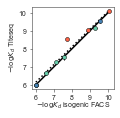

In [13]:
sns.set_style('ticks')
from matplotlib.ticker import FixedLocator, FixedFormatter
#sns.set_context('notebook')
plot_list = results_merge[~results_merge['KD_titeseq'].isna()]
plt.rcParams['font.sans-serif'] = "Arial"
# Then, "ALWAYS use sans-serif fonts"
plt.rcParams['font.family'] = "sans-serif"
plt.rcParams['axes.linewidth'] = 0.5
flierprops = dict(marker='o', markersize=2)
plt.figure(figsize=(1.5,1.5))
x_locator = FixedLocator([6,7,8,9,10])
slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(-plot_list['KD'], plot_list['KD_titeseq'])
xs = np.array([6,10])
plt.plot(xs, xs, 'k-')
plt.plot(xs, slope*xs + intercept, 'k:')
corr, _ = pearsonr(-plot_list['KD'], plot_list['KD_titeseq'])

colordict = {'MA90':'tomato', 'SI06':'mediumaquamarine', 'G189E':'steelblue'}

for ag,color in colordict.items():
    to_plot = plot_list.loc[ag,:]
    plt.errorbar(x=-to_plot['KD'],
                 y=to_plot['KD_titeseq'],
                 xerr=to_plot['KD_std'],
                 yerr=to_plot['KD_titeseq_err'],
                 linestyle='none',
                 linewidth=1,
                 marker='o',
                 markersize=4,
                 markeredgecolor='k',
                 markeredgewidth=0.5,
                 label=ag,
                 ecolor='k',
                color=color)
import scipy.stats
plt.xticks(ticks=[6,7,8,9,10],labels=['6','7','8','9','10'],fontsize=7)
plt.yticks(ticks=[6,7,8,9,10],labels=['6','7','8','9','10'],fontsize=7)
#plt.legend(fontsize=7,bbox_to_anchor=(0.5, 1.1), loc='right')
plt.tick_params(length=2.5,width=0.5)
#plt.legend(loc='best',fontsize=7)
plt.xlabel(r'$-\log K_d$ isogenic FACS',fontsize=7,labelpad=0)
plt.ylabel(r'$-\log K_d$ Titeseq',fontsize=7,labelpad=0)
#plt.title('r =  %.2f' % corr,fontsize=8,y=1)
#plt.title('CR9114, Comparison of Titeseq to isogenic measurement\n$R^2=%0.3f$' % r_value**2)
plt.axis('square')
plt.savefig('images/CH65_iso_validation.png',transparent=True, dpi=600,bbox_inches='tight')
print(corr)